In [22]:
%pip install matplotlib
%pip install scipy

## MP 573 Lecture 14: Applications of the DFT: convolution
##
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
%matplotlib inline
#%matplotlib notebook
import numpy as np
import numpy.linalg as alg
from IPython.display import display, Image, HTML
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal
import math 
from PIL import Image
import time

font = {'weight' : 'normal',
        'size'   : 18}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Linear vs Circular Convolution

In our discussion of DFTs, it will be important to distinguish the linear convolution (denoted by $\ast$)  from the circular convolution (denoted by $\circledast$) between two sequences. 

**Linear convolution.** For any two length-M sequences $f_1[m] $ and $f_2[m]$, their linear convolution  is defined as $$\left( f_1 \ast f_2 \right) [m] = \sum_{l=0}^{M-1} f_1[l] f_2[m-l]  \hbox{, for } m=0,1,\ldots,2M-2$$
where $f_2[m-l]$ is assumed to be zero for values of $m-l$ outside the range $[0,M-1]$. In other words, the linear convolution assumes a non-periodic (zero-padded) extension of the input sequences. 

**Circular convolution.** For any two length-M sequences $f_1[m] $ and $f_2[m]$, their circular convolution (also known as ``periodic convolution'') is defined as follows: $$\left( f_1 \circledast f_2 \right) [m] = \sum_{l=0}^{M-1} f_1[l] f_2[(m-l)_M]  \hbox{, for } m=0,1,\ldots,M-1$$

where $(\cdot)_M$ in $f_2[(m-l)_M]$ refers to the modulo operation (the remainder of the division $\frac{m-l}{M}$), and is sometimes written as $(m-l) \mod M$. Importantly, for two length-M sequences $f_1[m] $ and $f_2[m]$, their linear convolution is a sequence of length $2M-1$, whereas their circular convolution is a sequence of length $M$. In other words, the linear and circular convolutions are fundamentally different operations. However, they are equivalent under certain conditions, which we will examine in subsequent lectures. 



## Circular convolution property.  

The circular convolution between two sequences has DFT given by the multiplication of their corresponding DFTs. In other words, the DFT of $f_3[m] = \left( f_1 \circledast f_2 \right) [m]$ is $\hat{f_3}[k] = \hat{f_1}[k] \hat{f_2}[k]$. 

In [23]:
# Here is a simple implementation of circular convolution
def cconv(f1,f2):
    M = len(f1)
    f3 = 0*f1
    for m in range(M):
        for m2 in range(M):
            f3[m] = f3[m] + f1[m2]*f2[(m-m2)%M]
    return f3

Linear convolution 
Time required: 
5.0067901611328125e-05

Circular convolution: 
Time required: 
4.887580871582031e-05


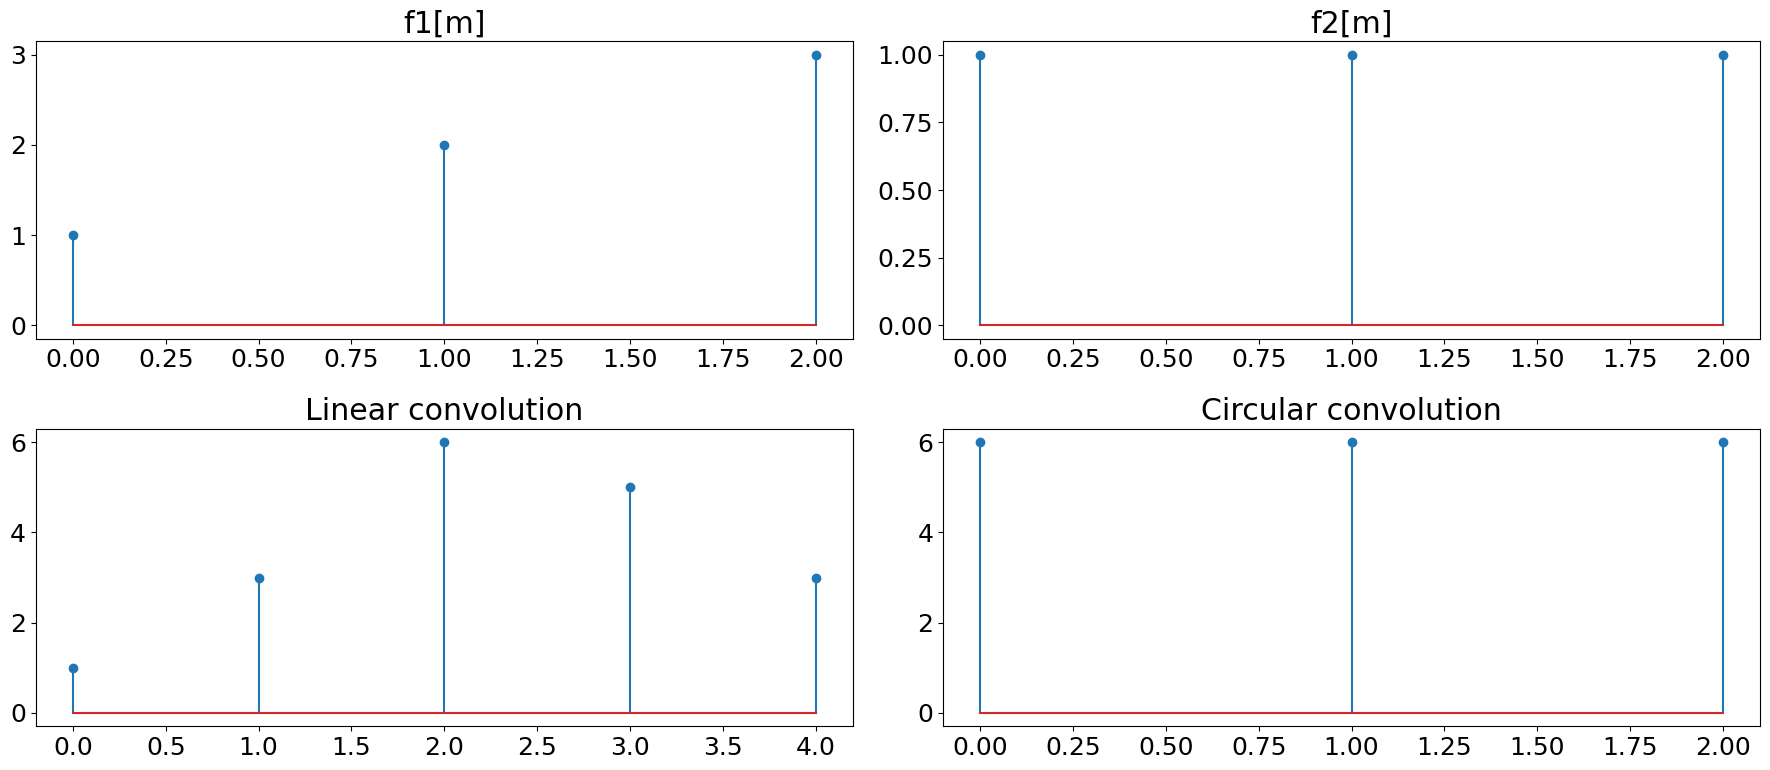

In [24]:
# Create some signals f1 and f2
f1 = np.array([1.,2.,3.])
f2 = np.array([1.,1.,1.])
#f1 = np.ones(1000)
#f2 = np.ones(1000)
M = len(f1)



# Do linear convolution
t = time.time()
f3_linear = np.convolve(f1,f2)
elapsed_linear = time.time() - t

# Do circular convolution
t = time.time()
f3_circ = cconv(f1,f2)
elapsed_circ = time.time() - t


# Plot original signals and convolutions
plt.figure(figsize=(18,8))
plt.rc('font', **font)
plt.subplot(2,2,1)
plt.stem(f1)
plt.title('f1[m]')
plt.subplot(2,2,2)
plt.stem(f2)
plt.title('f2[m]')

print('Linear convolution ')
#print(f3_linear)
plt.subplot(2,2,3)
plt.stem(f3_linear)
plt.title('Linear convolution')
print('Time required: ')
print(elapsed_linear)


plt.subplot(2,2,4)
plt.stem(f3_circ)
plt.title('Circular convolution')
print('\nCircular convolution: ')
#print(f3_circ)
print('Time required: ')
print(elapsed_circ)
plt.tight_layout(pad=1.0)



DFT-based convolution: 
Time required: 
0.00017976760864257812


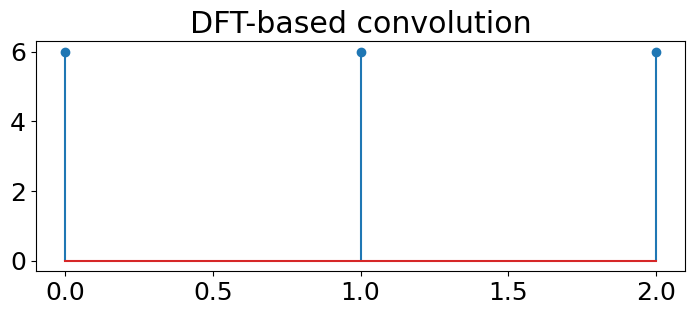

In [25]:
# Now calculate the convolution using multiplication in the DFT domain
t = time.time()
fhat1 = np.fft.fft(f1)
fhat2 = np.fft.fft(f2)
fhat3 = fhat1*fhat2
f3_dft = np.fft.ifft(fhat3)
elapsed_dft = time.time() - t

plt.figure(figsize=(14,6))
plt.rc('font', **font)
plt.subplot(2,2,1)
plt.stem(np.real(f3_dft))
plt.title('DFT-based convolution')
plt.tight_layout(pad=1.0)


print('DFT-based convolution: ')
#print(np.real(f3_dft))
print('Time required: ')
print(elapsed_dft)

Linear convolution 
Time required: 
3.1948089599609375e-05

Circular convolution (zero-padded): 
Time required: 
3.218650817871094e-05


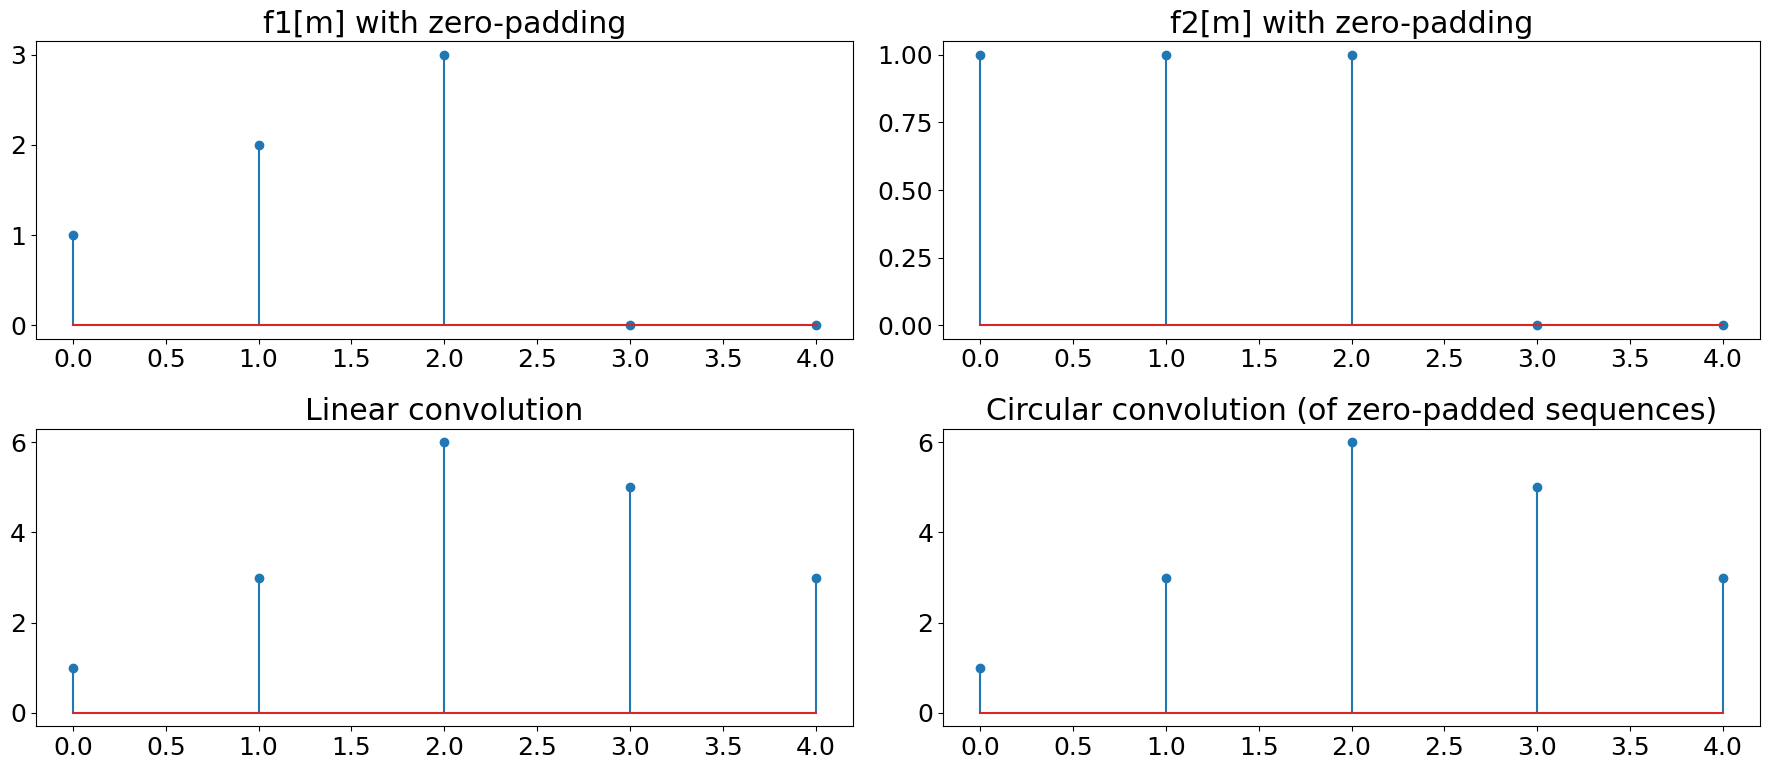

In [26]:
# Now with zero padding
f1_ZP = np.concatenate((f1,np.zeros(M-1)))
f2_ZP = np.concatenate((f2,np.zeros(M-1)))

# Do linear convolution
t = time.time()
f3_linear = np.convolve(f1,f2)
elapsed_linear = time.time() - t

# Do circular convolution
t = time.time()
f3_circ = cconv(f1_ZP,f2_ZP)
elapsed_circ = time.time() - t


# Plot original signals and convolutions
plt.figure(figsize=(18,8))
plt.rc('font', **font)
plt.subplot(2,2,1)
plt.stem(f1_ZP)
plt.title('f1[m] with zero-padding')
plt.subplot(2,2,2)
plt.stem(f2_ZP)
plt.title('f2[m] with zero-padding')

print('Linear convolution ')
#print(f3_linear)
plt.subplot(2,2,3)
plt.stem(f3_linear)
plt.title('Linear convolution')
print('Time required: ')
print(elapsed_linear)


plt.subplot(2,2,4)
plt.stem(f3_circ)
plt.title('Circular convolution (of zero-padded sequences)')
print('\nCircular convolution (zero-padded): ')
#print(f3_circ)
print('Time required: ')
print(elapsed_circ)
plt.tight_layout(pad=1.0)




DFT-based convolution (zero-padded): 
Time required: 
0.00011801719665527344


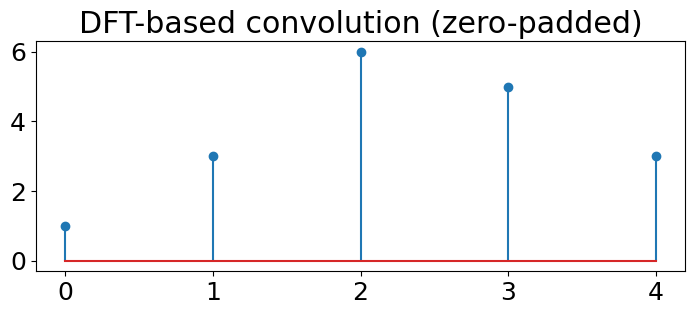

In [27]:
# Now calculate the convolution using multiplication in the DFT domain
t = time.time()
fhat1 = np.fft.fft(f1_ZP)
fhat2 = np.fft.fft(f2_ZP)
fhat3 = fhat1*fhat2
f3_dft = np.fft.ifft(fhat3)
elapsed_dft = time.time() - t

plt.figure(figsize=(14,6))
plt.rc('font', **font)
plt.subplot(2,2,1)
plt.stem(np.real(f3_dft))
plt.title('DFT-based convolution (zero-padded)')
plt.tight_layout(pad=1.0)


print('DFT-based convolution (zero-padded): ')
#print(np.real(f3_dft))
print('Time required: ')
print(elapsed_dft)

## Now let's try a 2D filtering example

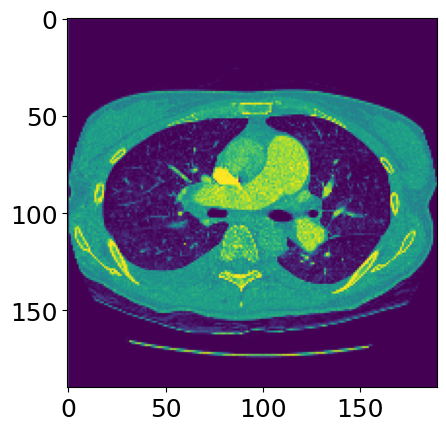

In [29]:
# If data are not here, copy over
import os.path
check_file = os.path.isfile('data/lecture015_example.mat')
if check_file == False:
  !wget https://github.com/dherarr/mp573_2025/blob/main/data/lecture015_example.mat?raw=true
  !mkdir data
  !mv lecture015_example.mat\?raw\=true data/lecture015_example.mat



# Load some image from file
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'lecture015_example.mat')
mat_contents = sio.loadmat(mat_fname)
mat_contents
f = mat_contents['f1']
f = f[::2,::2].astype('float')
sx = len(f)
sy = len(f[:])
h = mat_contents['h']

h = h[::2,::2].astype('float')
#h = 0*h
#h[95:96,95:96] = 1.0

#h = h + 0.0001
#h = h/sum(sum(h))
plt.imshow(abs(f))

#plt.imshow(abs(h))



In [30]:
a = int(sx-np.ceil(sx/2))
b = int(sx+np.floor(sx/2))


Difference between two ways to calculate circular convolution:
2.263362804447428e-16


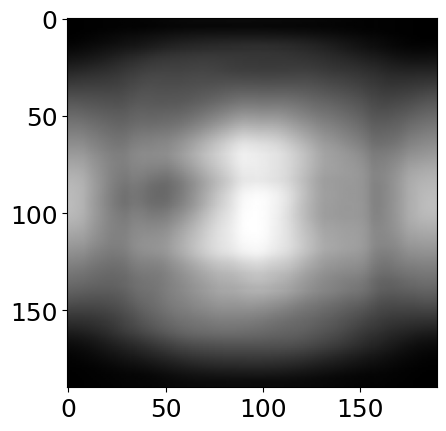

In [31]:
# Compute circular convolution
f2 = signal.convolve2d(h, f, mode='full', boundary='wrap')
a = int(sx-np.ceil(sx/2))
b = int(sx+np.floor(sx/2))
f2 = f2[a:b,a:b]

# Compute circular convolution using the FFT
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))
hhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(h)))
f3 = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat*hhat))))
fig = plt.figure()
imgplot = plt.imshow((f3),cmap='gray')
print('Difference between two ways to calculate circular convolution:')
print(alg.norm(abs(f3-f2))/alg.norm(f3))

Difference between two ways to calculate linear convolution:
2.2054263189307561e-16


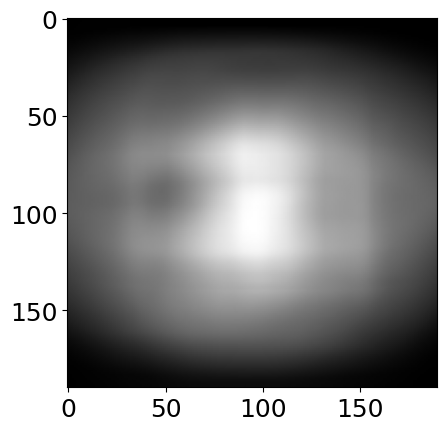

In [34]:
# Compute linear convolution
f4 = signal.convolve2d(h, f, mode='full', boundary='fill')
a = int(sx-np.ceil(sx/2))
b = int(sx+np.floor(sx/2))
f4 = f4[a:b,a:b]
#fig = plt.figure()
#imgplot = plt.imshow(abs(f3),cmap='gray')

# Compute linear convolution using the FFT
fzp = np.zeros([2*sx,2*sy])
fzp[a:b,a:b] = f
hzp = np.zeros([2*sx,2*sy])
hzp[a:b,a:b] = h
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(fzp)))
hhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(hzp)))
f5 = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat*hhat))))
f5 = f5[a:b,a:b]
fig = plt.figure()
imgplot = plt.imshow((f5),cmap='gray')
print('Difference between two ways to calculate linear convolution:')
print(alg.norm(abs(f5-f4))/alg.norm(f5))

In [35]:
print('Difference between circular convolution and linear convolution:')
print(alg.norm(abs(f5-f3))/alg.norm(f5))

Difference between circular convolution and linear convolution:
0.169260409898284


## Q1: DFT-based convolution (remember the previous lecture's quiz)

We have two length-M sequences $f_1[m]$ and $f_2[m]$, and we run the following operations: 
1. DFT of each sequence, to obtain $\hat{f}_1[k]$ and $\hat{f}_2[k]$
2. Pointwise multiplication of the DFTs, to obtain $\hat{f}_3[k] = \hat{f}_1[k]\hat{f}_2[k]$
3. Inverse DFT, to obtain $f_3[m]$

What would be the equivalent operation in the 'spatial' domain, that would yield the same sequence $f_3[m]$?

A: Linear convolution between $f_1[m]$ and $f_2[m]$

B: Circular convolution between $f_1[m]$ and $f_2[m]$

C: Pointwise multiplication between $f_1[m]$ and $f_2[m]$

D: Sum of $f_1[m]$ and $f_2[m]$

## Q2: DFT-based zero-padded convolution

We have two length-M sequences $f_1[m]$ and $f_2[m]$, and we run the following operations: 
1. Zero-pad each sequence by appending M-1 zeros at the end (so the sequences now have length 2M-1)
2. DFT of each zero-padded sequence, to obtain $\hat{f}_1[k]$ and $\hat{f}_2[k]$ (each of length 2M-1, see line above)
3. Pointwise multiplication of the DFTs, to obtain $\hat{f}_3[k] = \hat{f}_1[k]\hat{f}_2[k]$
4. Inverse DFT, to obtain $f_3[m]$ (of length 2M-1, see step 1 above)

What would be the equivalent operation in the 'spatial' domain, that would yield the same sequence $f_3[m]$?

A: Linear convolution between $f_1[m]$ and $f_2[m]$

B: Circular convolution between $f_1[m]$ and $f_2[m]$

C: Pointwise multiplication between $f_1[m]$ and $f_2[m]$

D: Sum of $f_1[m]$ and $f_2[m]$

## Q3: DFT-based linear convolution in multiple dimensions

[TRUE/FALSE] Zero-padding (ie: appending zeros to our discrete signals, so that our circular convolution calculated via DFTs gives the same result as a linear convolution) works in multiple dimensions too. In other words, we can use DFTs (and FFTs) to do rapid linear convolutions in signals with 2, 3,... dimensions. In the multi-dimensional case, this is done by appending zeros along each dimension. For instance, if we start out with a MxM array, we could add zeros in each dimension, leading to a (2M-1)x(2M-1) array, and then our circular 2D convolution will be equivalent to a linear 2D convolution of the original MxM arrays. 

TRUE

FALSE
